# Bartosz Woziwoda 402935 gr 3a
## Analiza i Bazy Danych

# LAB 2

**Numer swojego datasetu uzyskujemy ze wzoru (N mod 5) +1, gdzie N to liczba liter w nazwisku.**

Woziwoda -> N = 8
(8 mod 5) +1 = **4** 
<br>
" 4. drinks.csv Dane i informacje: https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/ "

### 1. Wczytanie bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Wczytanie danych

In [3]:
df = pd.read_csv("drinks.csv",sep=',',header=0,index_col=0)
#,error_bad_lines=False)

In [4]:
df

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
country,,,,
Afghanistan,0,0,0,0.0
Albania,89,132,54,4.9
Algeria,25,0,14,0.7
Andorra,245,138,312,12.4
Angola,217,57,45,5.9
...,...,...,...,...
Venezuela,333,100,3,7.7
Vietnam,111,2,1,2.0
Yemen,6,0,0,0.1


Jak widać zbiór zawiera informacje o konsumpcji poszczególnych alkoholi (piwo, spirytus, wino) w 193 państwach.

### 3. Podstawowe informacje o zbiorze danych

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   beer_servings                 193 non-null    int64  
 1   spirit_servings               193 non-null    int64  
 2   wine_servings                 193 non-null    int64  
 3   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 7.5+ KB


In [27]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


### 4. Rankingi, wnioski
**4.1 Ranking krajów o największym całkowitym spożyciu alkoholu:**

In [28]:
total_sorted = df.sort_values("total_litres_of_pure_alcohol", ascending = False)
total_sorted

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
country,,,,
Belarus,142,373,42,14.4
Lithuania,343,244,56,12.9
Andorra,245,138,312,12.4
Grenada,199,438,28,11.9
Czech Republic,361,170,134,11.8
...,...,...,...,...
Iran,0,0,0,0.0
Kuwait,0,0,0,0.0
Pakistan,0,0,0,0.0


#### 4.2 Kraje, gdzie spożycie alkoholowe jest równe zero:

In [34]:
no_drink = df[df['total_litres_of_pure_alcohol'] == 0]
no_drink

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
country,,,,
Afghanistan,0,0,0,0.0
Bangladesh,0,0,0,0.0
North Korea,0,0,0,0.0
Iran,0,0,0,0.0
Kuwait,0,0,0,0.0
Libya,0,0,0,0.0
Maldives,0,0,0,0.0
Marshall Islands,0,0,0,0.0
Mauritania,0,0,0,0.0


In [35]:
len(no_drink)

13

Jest 13 krajów, w których konsumpcja alkoholu wynosi 0

#### 4.3 Top 10 krajów pod względem konsumpcji piwa, spirytusu (?), wine

In [44]:
beer_top = df.sort_values("beer_servings", ascending = False)['beer_servings'][:10]
spirit_top = df.sort_values("spirit_servings", ascending = False)['spirit_servings'][:10]
wine_top = df.sort_values("wine_servings", ascending = False)['wine_servings'][:10]

In [45]:
beer_top

country
Namibia           376
Czech Republic    361
Gabon             347
Germany           346
Lithuania         343
Poland            343
Venezuela         333
Ireland           313
Palau             306
Romania           297
Name: beer_servings, dtype: int64

In [46]:
spirit_top

country
Grenada               438
Belarus               373
Haiti                 326
Russian Federation    326
St. Lucia             315
Guyana                302
Slovakia              293
Dominica              286
Thailand              258
Cook Islands          254
Name: spirit_servings, dtype: int64

In [47]:
wine_top

country
France               370
Portugal             339
Andorra              312
Switzerland          280
Denmark              278
Slovenia             276
Luxembourg           271
Croatia              254
Italy                237
Equatorial Guinea    233
Name: wine_servings, dtype: int64

#### 4.4 Korelacja między spożyciem poszczególnych alkoholi

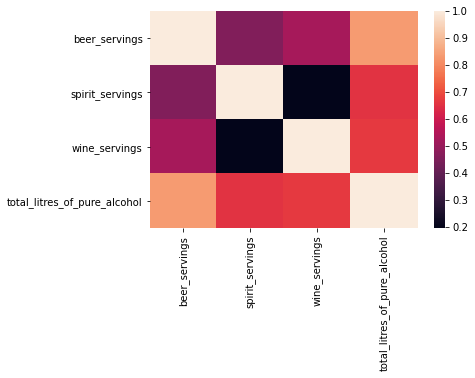

In [48]:
sns.heatmap(df.corr());

Wnioski:
- korelacja między spożyciem piwa i pozostałych alkoholi jest dość wysoka- na poziomie 0.45-0.6
- korelacja między spożyciem wina i spirytusu jest zaskakująco mała- na poziomie 0.2